Example from: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

Let's first load the required dataset you will use.

In [1]:
#Import scikit-learn dataset library
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()

Exploring Data

After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.

In [2]:
# print the names of the features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Split the dataset by using the function train_test_split(). you need to pass parameters features, target, random state and test_set size. Additionally, you can use random_state to select records randomly.

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=10) # 70% training and 30% test

### Random Forest

**Generating Model**

- We defined a hyperparameter distribution for the random forest classifier using scipy.stats.randint. This will specify a range of values for the n_estimators, max_depth, and max_features hyperparameters that will be sampled during the random search.
- Then we created an instance of the RandomForestClassifier class and an instance of RandomizedSearchCV with n_iter=100, which specifies that we want to sample 100 different combinations of hyperparameters during the search.
- Then we used random search object to the training data using fit, which performs the search and returns the best hyperparameters and corresponding score.
- We used randint as a hyperparameter tuning, which involves selecting the best combination of hyperparameters for a given model. Randint can also be used to randomly sample hyperparameters from a given range, which can help to ensure that the hyperparameter search is both thorough and efficient. In our code randint(1, 11) will generate random integers upto 10.

In [19]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
# Define the hyperparameter distribution
param_dist = {'n_estimators': randint(1, 11),
              'max_depth': randint(1, 50),
              'max_features': randint(1, 30)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Set up the K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

# Use random search to find the best hyperparameters
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=kfold)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best hyperparameters: {'max_depth': 12, 'max_features': 20, 'n_estimators': 5}
Best score: 0.9574367088607595


In [20]:
# Fit the classifier to the training data using the best hyperparameters
rf = RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'],
                            max_depth=random_search.best_params_['max_depth'],
                            max_features=random_search.best_params_['max_features'])
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=20, n_estimators=5)

**Fitting the model**<br>
- As we have found the best hyperparameters, now we will fit the model making use of those parameters to get best results.

In [21]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

Evaluating the Model

Let's estimate how accurately the classifier or model can predict the cancer of patients.

Accuracy can be computed by comparing actual test set values and predicted values.

In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Compute the accuracy of the classifier on the test data
accuracy = rf.score(X_test, y_test)

# Print the test accuracy
print("Test accuracy:", accuracy)


Test accuracy: 0.9298245614035088


Well, we got a classification rate of 92.98%, considered as very good accuracy.

For further evaluation, you we also check precision and recall of model.

In [13]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9385964912280702
Recall: 0.9553571428571429


**Visualization of Model**<br>
<br>
*Decision Tree*
- We will now visualize a single decision tree from the random forest model generated.

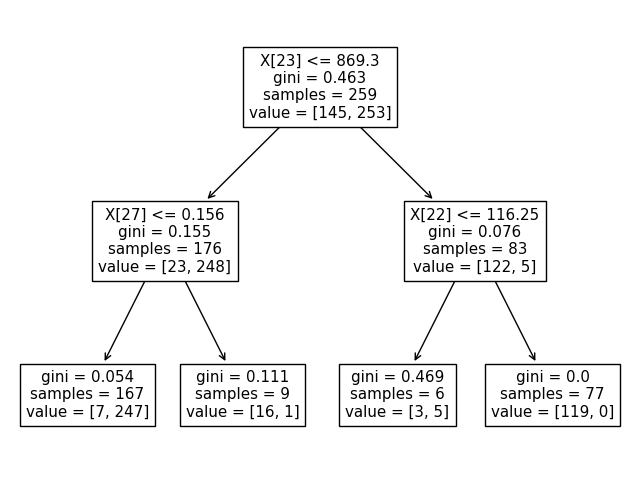

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract a single decision tree from the random forest
estimator = rf.estimators_[0]

# Plot the tree
fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(estimator, ax=ax)
plt.show()


- Now we will plot the feature importances of the random forest model. The feature importance tells us how important each feature is in making the classification decisions.

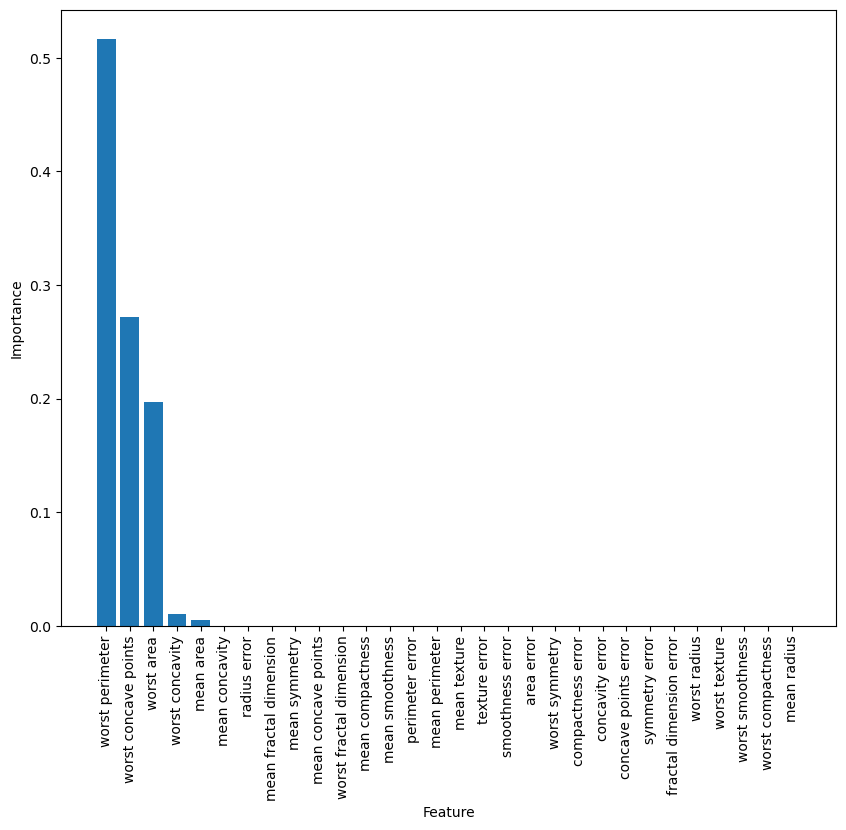

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained random forest model
importances = rf.feature_importances_

# Get feature names
feature_names = cancer.feature_names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(range(X_train.shape[1]), importances[indices])
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(feature_names[indices], rotation=90)
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')
plt.show()


- Now we will produce a grouped bar chart with the accuracy, precision, and recall scores as the y-axis and the metric names as the x-axis labels. 

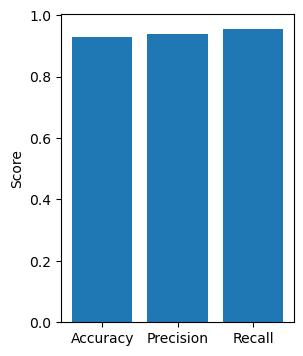

In [17]:
# grouped bar chart of the performance metrics
fig, ax = plt.subplots(figsize=(3, 4))
metrics_data = {'Accuracy': accuracy, 'Precision': metrics.precision_score(y_test, y_pred), 'Recall': metrics.recall_score(y_test, y_pred)}
ax.bar(metrics_data.keys(), metrics_data.values())
ax.set_ylabel('Score')
plt.show()

### K-Nearest Neighbors (KNN) classifier

#### Generating the model
- We will first create a KNN classifier object. 
- Then define a hyperparameter grid to search over and used GridSearchCV to find the best hyperparameters. 
- The code then fits the classifier to the training data using the best hyperparameters.
- Then we will make predictions on the test data, and compute the accuracy, precision, and recall of the classifier on the test data. 
- We will then plot the accuracy, precision, and recall using a bar chart.

In [79]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Define the hyperparameter grid to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

- We will now fit the set and look for best hyperparameters for our model

In [81]:
from sklearn.model_selection import GridSearchCV
# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 13}
Best score: 0.9321518987341773


- Now we will fit the classifier to the training data using the best hyperparameters

In [82]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

- We the calculate the accuracy of the classifier on the test data

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
# Print the test accuracy
print("Test accuracy:", accuracy)

Test accuracy: 0.34502923976608185


Well, we got a classification rate of 94.73%, considered as very good accuracy.

For further evaluation, you we also check precision and recall of model.

No we will compute the precision and recall of the classifier on the test data

In [86]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the precision and recall
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9904761904761905
Recall: 0.9285714285714286


#### Visualization of the model

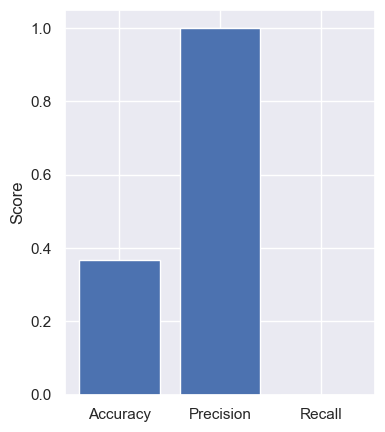

In [140]:
fig, ax = plt.subplots(figsize=(4, 5))
metrics_data = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
ax.bar(metrics_data.keys(), metrics_data.values())
ax.set_ylabel('Score')
plt.show()

- We will now create a bar plot of the target variable in the breast cancer dataset using seaborn library.
- This represents the diagnosis of a tumor as either malignant (0) or benign (1). 
- The countplot() function will count the number of occurrences of each value in the target variable and plot the results. 
- The xticks() function is used to replace the default labels (0 and 1) with 'Malignant' and 'Benign'. 
- xlabel() and ylabel() functions to label the axes.

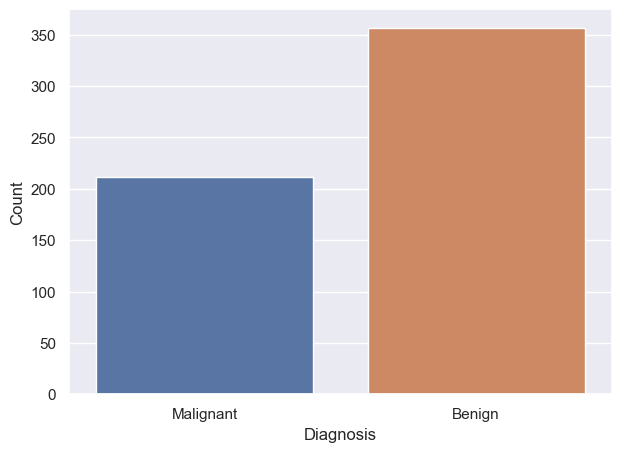

In [139]:
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x=cancer.target)
sns.set(rc={'figure.figsize':(4,5)})
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

### Logistic Regression 

- Logistic regression is a statistical method used to analyze the relationship between a binary outcome (dependent variable) and one or more predictor variables.
- The output of the logistic regression model is a probability, which can be converted to a binary decision using a threshold value.

#### Generating the model
- We already have the split data.
- Create a logistic regression classifier, while cerating this we will first have to scale the data using StandardScaler.
- fit it to the training data. 
- Make predictions on the test data, and its accuracy, precision, and recall are calculated. 
- Finally, we will again split the data for only 2 features instead of 30 and fit a logistic regression classifier inorder to visualize the decision boundary using a scatter plot.

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier object with increased max_iter
log_reg = LogisticRegression(max_iter=1000)

# Fit the classifier to the scaled training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

- Now we wil predict on test data.
- Compute the accuracy of classifier on test data.

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy:", accuracy)

Test accuracy: 0.3684210526315789


Well, we got a classification rate of 34.50%, which is very poor accuracy.
- One possible reason for the poor accuracy of the logistic regression model could be that the dataset is imbalanced, meaning the dataset has more instances of the "benign" class than the "malignant" class. This makes the model to be biased towards predicting the majority class and results in lower accuracy overall.
- Features in the dataset are not highly predictive of the target variable.

For further evaluation, you we also check precision and recall of model.

No we will compute the precision and recall of the classifier on the test data

In [132]:
precision = precision_score(y_test, y_pred, zero_division=1) #as there are no predicted samples for a class
recall = recall_score(y_test, y_pred, zero_division=1)
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.0


#### Visualizing the Model
- The feature set has 30 features in it that cannot be visualized in Logistic Regression model. hence we will have to select only 2 feautures to plot the model.
- We will select 2 features by we by using X = cancer.data[:, :2].
- Then we used X and y to split the data into training and testing sets, fit a logistic regression classifier inorder to visualize the decision boundary using only the first two features.

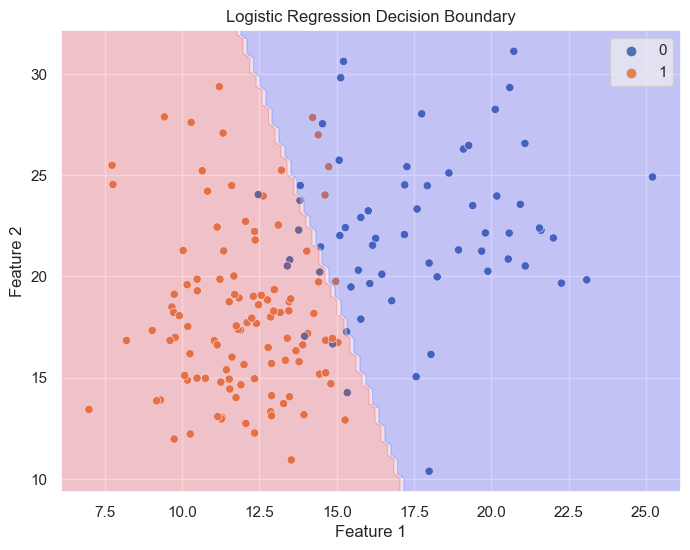

In [133]:
# Select the first two features of the dataset
X = cancer.data[:, :2]
y = cancer.target

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a logistic regression classifier object
log_reg = LogisticRegression()

# Fit the classifier to the training data
log_reg.fit(X_train, y_train)

# Visualize the model
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, ax=ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundary and the margins
ax.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Logistic Regression Decision Boundary')
plt.show()


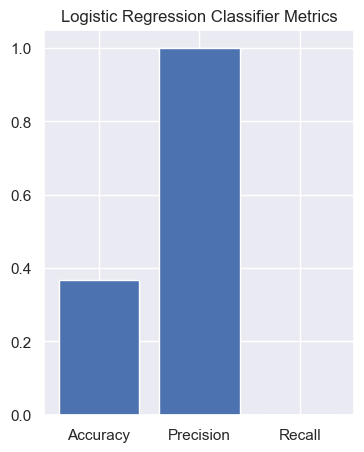

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
labels = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]
fig, ax = plt.subplots(figsize=(4, 5))
ax.bar(labels, values)
ax.set_title('Logistic Regression Classifier Metrics')
plt.show()